In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')

# convert from pandas data frame to tensor
data = torch.tensor(iris[iris.columns[0:-1]].values).float()

# transform species to numbers 
labels = torch.zeros(len(data), dtype = torch.long)

labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

In [3]:
def createANewModel():

  # model architecture
  ANNiris = nn.Sequential(
      nn.Linear(4,64),   # input layer
      nn.ReLU(),         # activation unit
      nn.Linear(64,64),  # hidden layer
      nn.ReLU(),         # activation unit
      nn.Linear(64,3),   # output units
        )

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)

  return ANNiris,lossfun,optimizer

In [4]:
# train the model

# global parameter
numepochs = 200

def trainTheModel(trainProp):

    # inititalize losses
    losses = torch.zeros(numepochs)
    trainAcc = []
    testAcc = []
    X_train,X_test, y_train,y_test = train_test_split(data,labels, train_size=trainProp)

    # loop over epochs
    for epochi in range(numepochs):
        
        yHat = ANNiris(X_train)
        loss = lossfun(yHat, y_train)

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # compute training accuracy
        trainAcc.append(100*torch.mean((torch.argmax(yHat, axis = 1) == y_train).float()).item())
        

        # test accuracy
        predlabels = torch.argmax(ANNiris(X_test), axis = 1)
        testAcc.append(100*torch.mean((predlabels == y_test).float()).item())
    
    return trainAcc, testAcc



In [5]:
ANNiris, lossfun, optimizer = createANewModel()

trainAcc, testAcc = trainTheModel(.8)

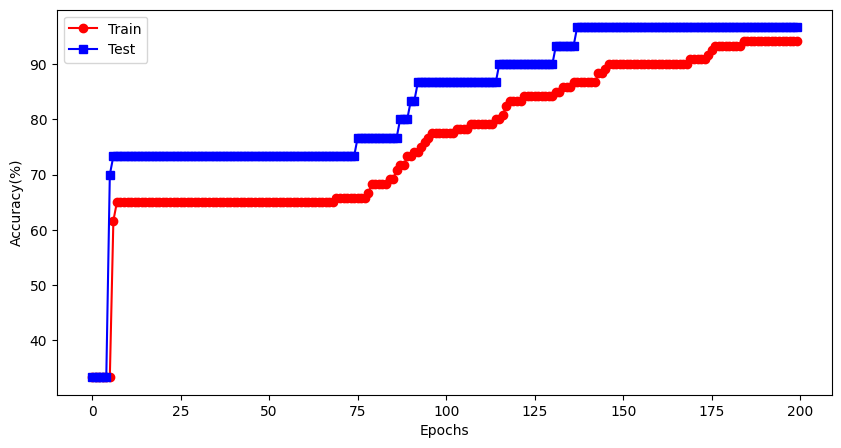

In [6]:
fig = plt.figure(figsize = (10,5))

plt.plot(trainAcc,'ro-')
plt.plot(testAcc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy(%)')
plt.legend(['Train','Test'])
plt.show()

In [7]:
trainSetSizes = np.linspace(.2,.95,10)

allTrainAcc = np.zeros((len(trainSetSizes),numepochs))
allTestAcc = np.zeros((len(trainSetSizes),numepochs))

for i in range(len(trainSetSizes)):
  
  # create a model
  ANNiris,lossfun,optimizer = createANewModel()
  
  # train the model
  trainAcc,testAcc = trainTheModel(trainSetSizes[i])
  
  # store the results
  allTrainAcc[i,:] = trainAcc
  allTestAcc[i,:] = testAcc

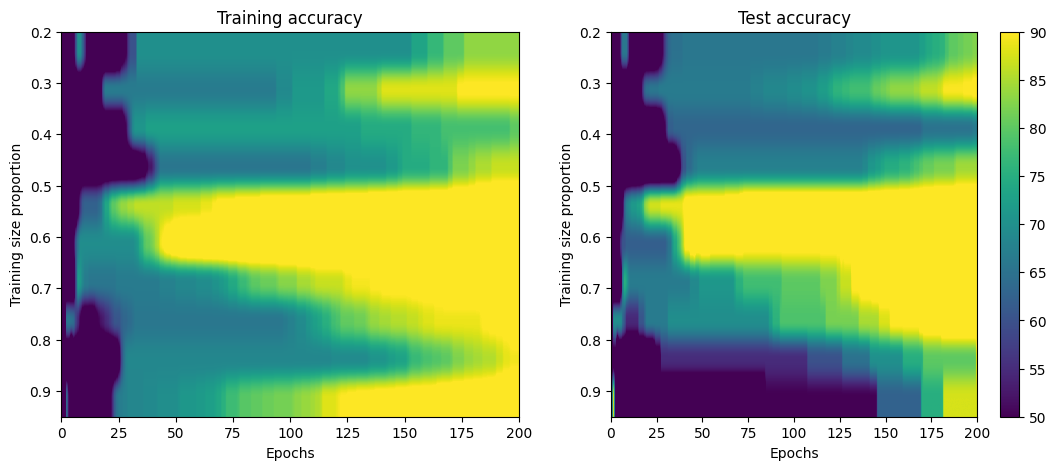

In [8]:
fig,ax = plt.subplots(1,2,figsize=(13,5))

ax[0].imshow(allTrainAcc,aspect='auto',
             vmin=50,vmax=90, extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training size proportion')
ax[0].set_title('Training accuracy')

p = ax[1].imshow(allTestAcc,aspect='auto',
             vmin=50,vmax=90, extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training size proportion')
ax[1].set_title('Test accuracy')
fig.colorbar(p,ax=ax[1])

plt.show()